In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [2]:
train = pd.read_csv('/Users/parthpatel/WPI/Stats/Project/Stats_Project/data/sales_train.csv')
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [316]:
train.loc[(train['shop_id']==59)&(train['item_id']==22154)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0


In [318]:
train.loc[(train['shop_id']==25)&(train['item_id']==7409)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935840,2015-10-31,33,25,7409,299.0,1.0
2935843,2015-10-09,33,25,7409,299.0,1.0
2935844,2015-10-10,33,25,7409,299.0,1.0


In [3]:
train["date"] = pd.to_datetime(train['date'], format='%d.%m.%Y')

In [280]:
sales = pd.pivot_table(train,values='item_cnt_day',index='date',aggfunc='sum').reset_index()

In [75]:
np.array(sales.date) 

array(['2013-01-01T00:00:00.000000000', '2013-01-02T00:00:00.000000000',
       '2013-01-03T00:00:00.000000000', ...,
       '2015-10-29T00:00:00.000000000', '2015-10-30T00:00:00.000000000',
       '2015-10-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [5]:
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=30,figsize=(35,15)):    
    rolling_mean = ts.item_cnt_day.rolling(window=window).mean()    
    rolling_std = ts.item_cnt_day.rolling(window=window).std()
    plt.figure(figsize=figsize)    
    plt.title('sales')    
    plt.plot(ts['item_cnt_day'][window:], label='Actual values', color="black")    
    if plot_ma:        
        plt.plot(rolling_mean, 'g', label='MA'+str(window),
               color="red")    
    if plot_intervals:
        lower_bound = rolling_mean - (1.96 * rolling_std)
        upper_bound = rolling_mean + (1.96 * rolling_std)
    plt.fill_between(x=np.array(ts.date.astype(str)) , y1=lower_bound, y2=upper_bound,
                    color='lightskyblue', alpha=0.4)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

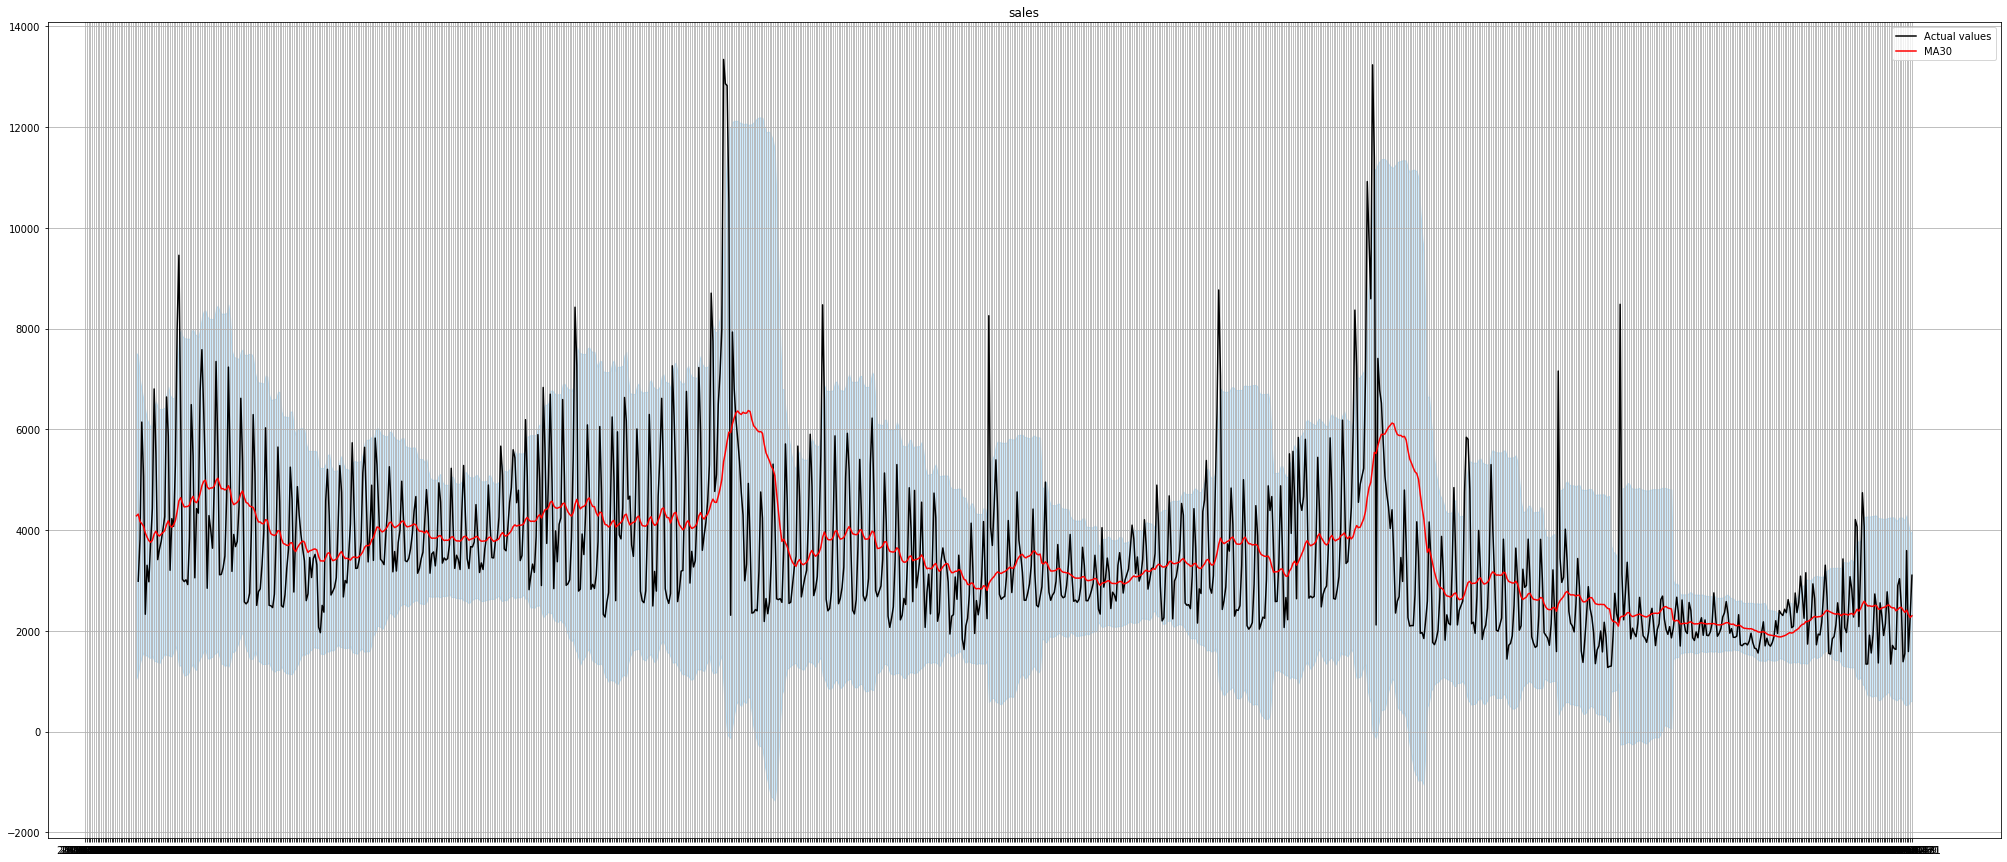

In [6]:
plot_ts(sales, window=30)

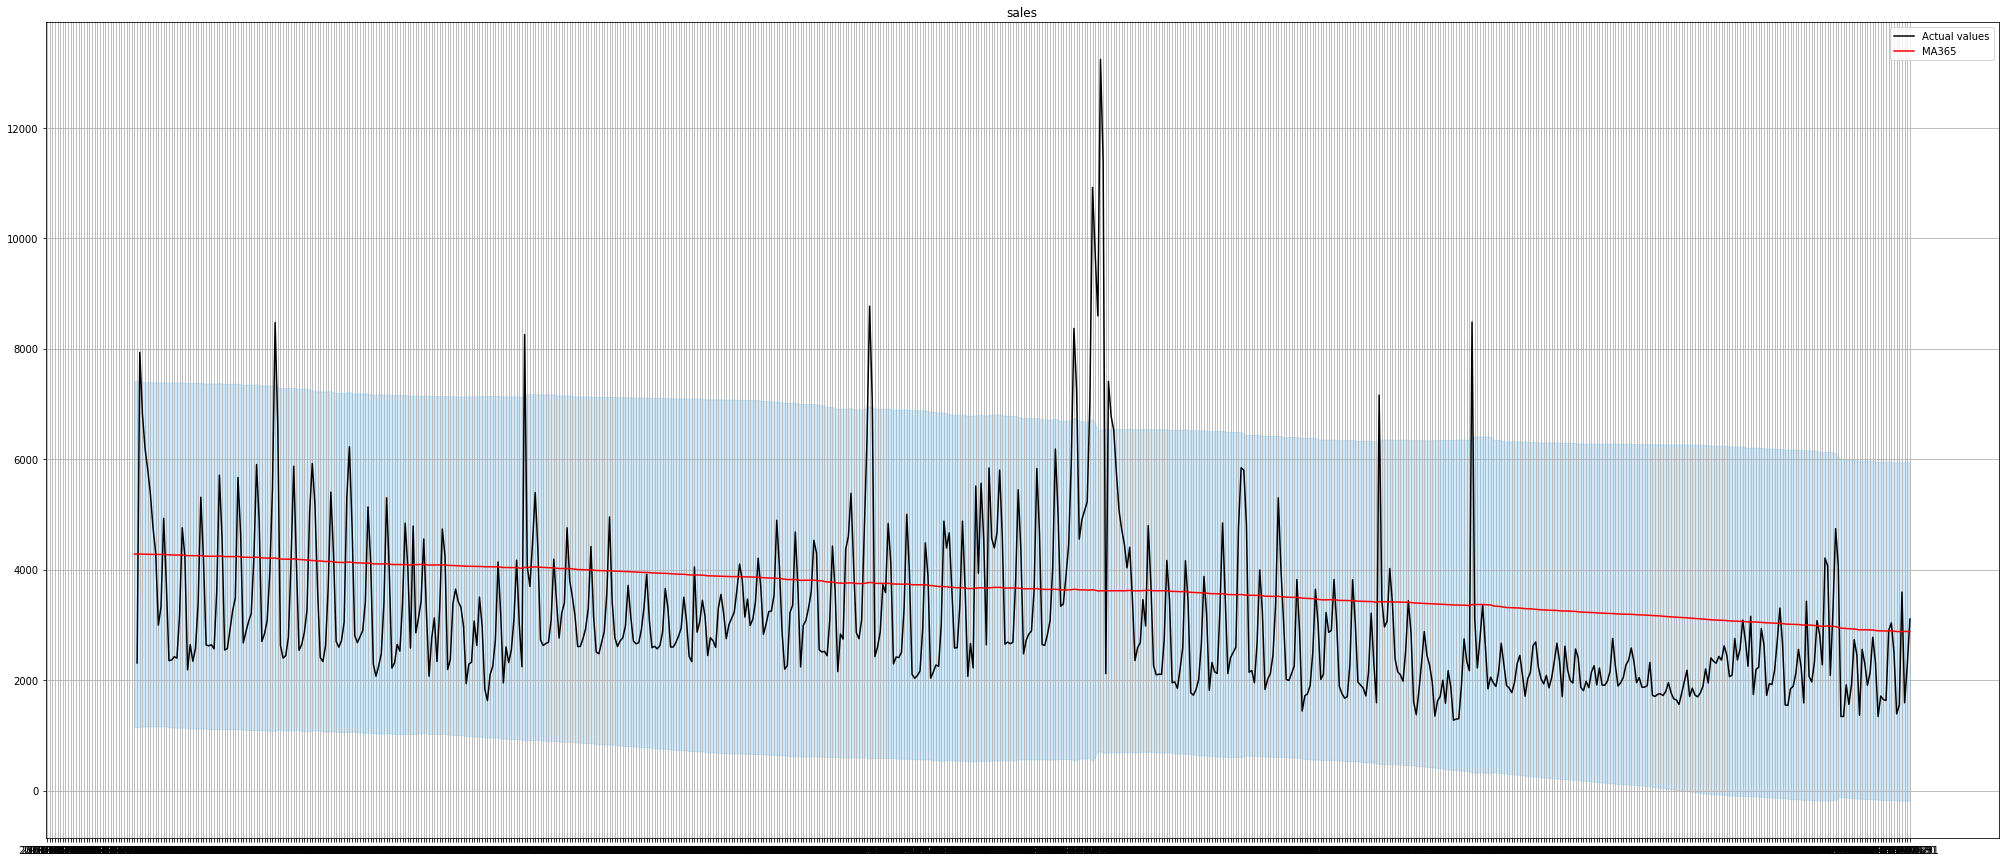

In [7]:
plot_ts(sales, window=365)

In [8]:

from statsmodels.tsa.stattools import adfuller
result = adfuller(sales.item_cnt_day.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.045604
p-value: 0.001190
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [67]:
sales.item_cnt_day.values

array([1951., 8198., 7422., ..., 1589., 2274., 3104.])

In [259]:
sales['date'] = sales['date'].dt.strftime('%Y-%m-%d')

In [264]:
sales = sales.set_index('date')

In [131]:
sales

,item_cnt_day
date,
2013-01-01,1951.0
2013-01-02,8198.0
2013-01-03,7422.0
2013-01-04,6617.0
2013-01-05,6346.0
...,...
2015-10-27,1551.0
2015-10-28,3593.0
2015-10-29,1589.0


<Figure size 1200x600 with 0 Axes>

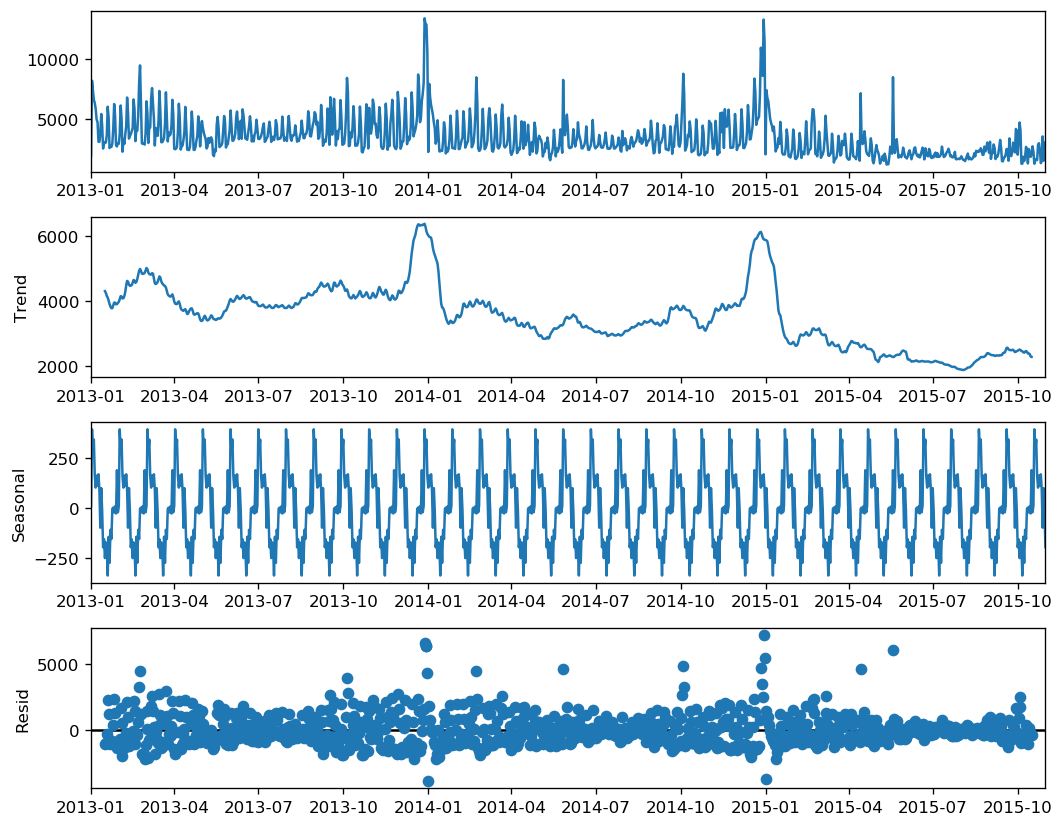

In [277]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
result = seasonal_decompose(sales, model='additive', period = 30)
pyplot.figure(figsize=(10,5))
result.plot()
pyplot.show()

<Figure size 3600x1200 with 0 Axes>

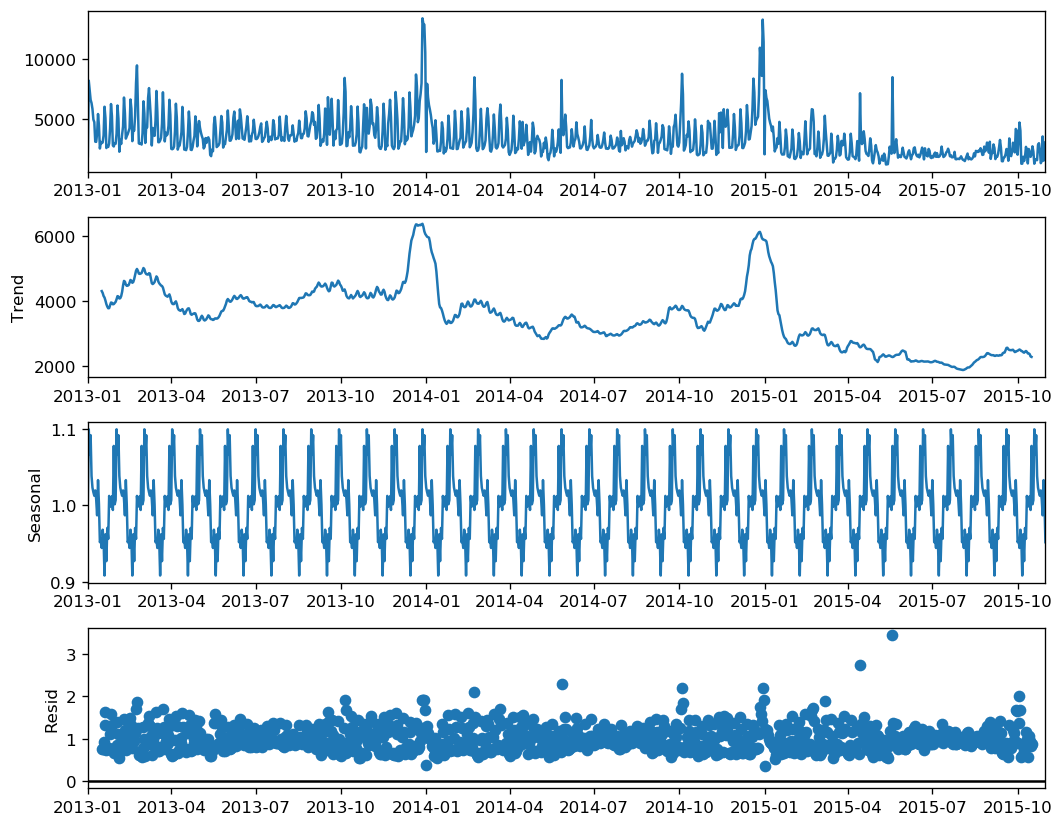

In [271]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
result = seasonal_decompose(sales, model='multiplicative', period = 30)
pyplot.figure(figsize=(30,10))
result.plot()
pyplot.show()

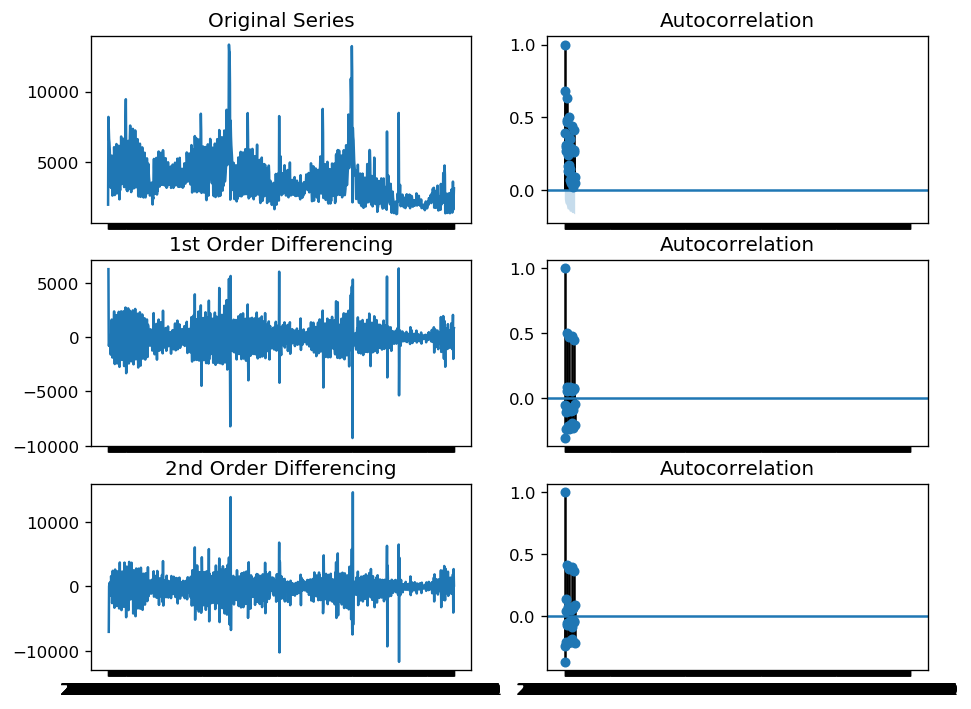

In [14]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(sales.item_cnt_day); axes[0, 0].set_title('Original Series')
plot_acf(sales.item_cnt_day, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(sales.item_cnt_day.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(sales.item_cnt_day.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(sales.item_cnt_day.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(sales.item_cnt_day.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [286]:
sales_train = sales.loc[sales['date']<='2015-07-31'].copy()
sales_test = sales.loc[sales['date']>'2015-07-31'].copy()

In [236]:
sales_test

,date,item_cnt_day,Day,Weekend,Weekday,01,02,03,04,05,06,07,08,09,10,11,12
1003,2015-10-01,2085.0,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1004,2015-10-02,3265.0,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1005,2015-10-03,4742.0,6,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1006,2015-10-04,4069.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1007,2015-10-05,1340.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1008,2015-10-06,1343.0,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1009,2015-10-07,1914.0,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1010,2015-10-08,1561.0,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1011,2015-10-09,1922.0,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1012,2015-10-10,2732.0,6,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [287]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(sales_train.item_cnt_day, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=16174.931, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18293.297, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=16173.918, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=17315.586, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=16175.771, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=16158.166, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=15947.020, Time=0.44 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=16090.835, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=16004.691, Time=0.98 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=15948.240, Time=0.31 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=15989.074, Time=0.25 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 2.521 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:       

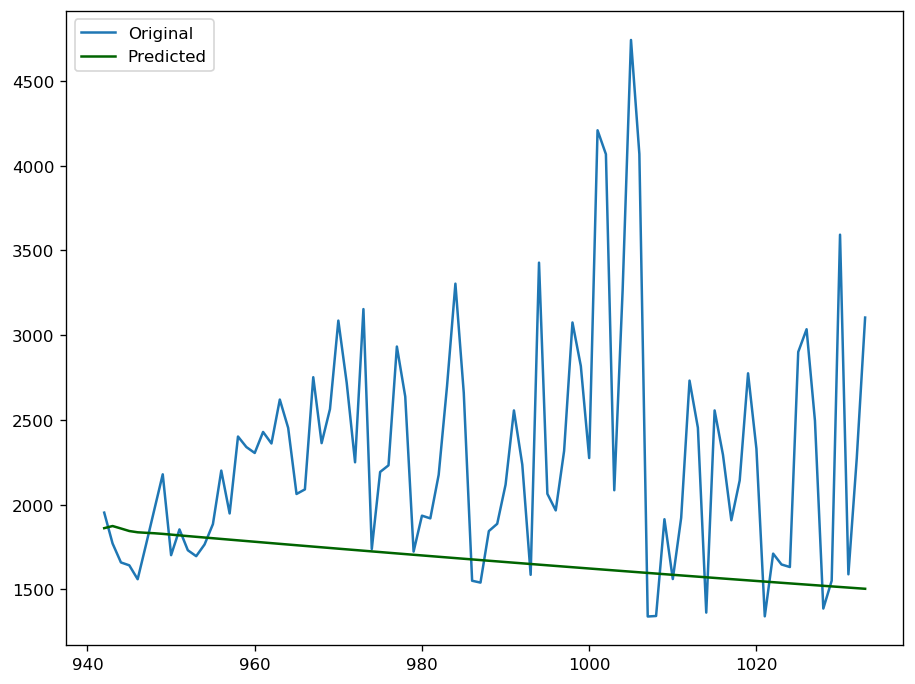

In [309]:
n_periods = 92
fc, confint = model.predict(n_periods=n_periods,return_conf_int=True)
index_of_fc = np.arange(len(sales_train), len(sales_train)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(sales_test.item_cnt_day, label='Original')
plt.plot(fc_series, label='Predicted',color='darkgreen')
plt.legend(loc="upper left")


In [312]:
mape = np.mean(np.abs(fc - sales_test.item_cnt_day)/np.abs(sales_test.item_cnt_day))  # MAPE
me = np.mean(fc - sales_test.item_cnt_day)             # ME
mae = np.mean(np.abs(fc - sales_test.item_cnt_day))    # MAE
mpe = np.mean((fc - sales_test.item_cnt_day)/sales_test.item_cnt_day)   # MPE
rmse = np.mean((fc - sales_test.item_cnt_day)**2)**.5  # RMSE
corr = np.corrcoef(fc, sales_test.item_cnt_day)[0,1]   # corr
mins = np.amin(np.hstack([fc[:,None], 
                              sales_test.item_cnt_day[:,None]]), axis=1)
maxs = np.amax(np.hstack([fc[:,None], 
                              sales_test.item_cnt_day[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)             # minmax
print({'mape':mape, 
       'me':me, 
       'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

{'mape': 0.24572090555259873, 'me': -607.8094919733245, 'mae': 664.6653019724977, 'mpe': -0.20802432891437236, 'rmse': 925.4522571430265, 'corr': -0.16837755804329838, 'minmax': 0.24361442118850374}


/Users/parthpatel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/Users/parthpatel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


In [285]:
sales_train

,date,item_cnt_day
0,2013-01-01,1951.0
1,2013-01-02,8198.0
2,2013-01-03,7422.0
3,2013-01-04,6617.0
4,2013-01-05,6346.0
...,...,...
998,2015-09-26,3075.0
999,2015-09-27,2818.0
1000,2015-09-28,2275.0
1001,2015-09-29,4209.0


In [291]:
model1 = pm.auto_arima(sales_train.item_cnt_day,                                 
                                 seasonal=True, stationary=False, 
                                 m=7, information_criterion='aic', 
                                 max_order=20,                                     
                                 max_p=10, max_d=3, max_q=10,                                     
                                 max_P=10, max_D=3, max_Q=10,                                   
                                 error_action='ignore')
print(model1.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  942
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -7761.372
Date:                             Mon, 13 Dec 2021   AIC                          15538.743
Time:                                     13:54:03   BIC                          15577.519
Sample:                                          0   HQIC                         15553.524
                                             - 942                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0161      0.390     -0.041      0.967      -0.780       0.748
ar.L1         -0.1514      

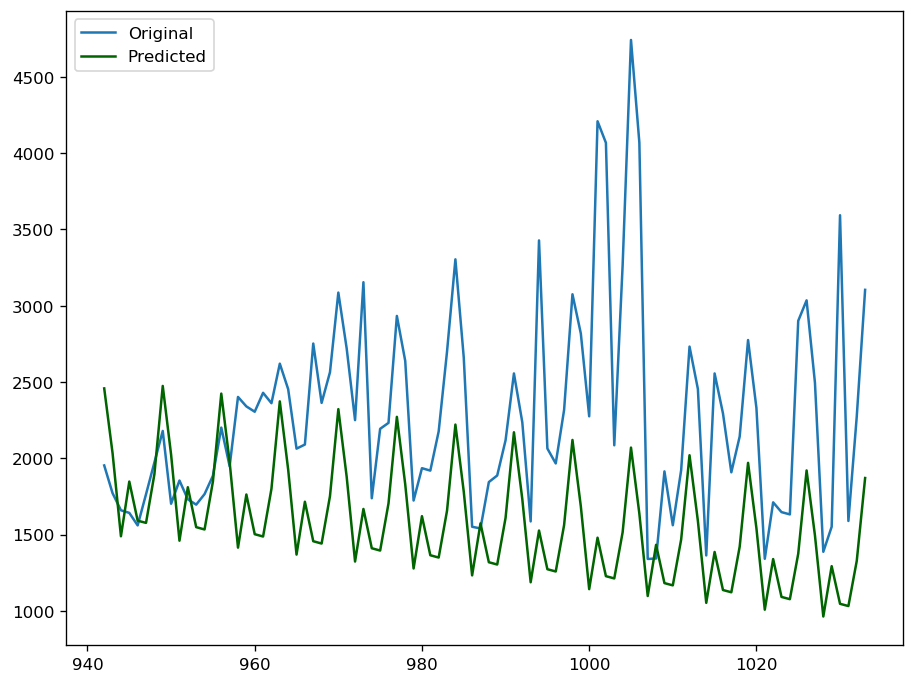

In [308]:
n_periods = 92
fc, confint = model1.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(sales_train), len(sales_train)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(sales_test.item_cnt_day, label='Original')
plt.plot(fc_series, label='Predicted',color='darkgreen')
plt.legend(loc="upper left")
plt.legend
plt.show()

In [293]:
mape = np.mean(np.abs(fc - sales_test.item_cnt_day)/np.abs(sales_test.item_cnt_day))  # MAPE
me = np.mean(fc - sales_test.item_cnt_day)             # ME
mae = np.mean(np.abs(fc - sales_test.item_cnt_day))    # MAE
mpe = np.mean((fc - sales_test.item_cnt_day)/sales_test.item_cnt_day)   # MPE
rmse = np.mean((fc - sales_test.item_cnt_day)**2)**.5  # RMSE
corr = np.corrcoef(fc, sales_test.item_cnt_day)[0,1]   # corr
mins = np.amin(np.hstack([fc[:,None], 
                              sales_test.item_cnt_day[:,None]]), axis=1)
maxs = np.amax(np.hstack([fc[:,None], 
                              sales_test.item_cnt_day[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)             # minmax
print({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

{'mape': 0.297150423215405, 'me': -703.019968257771, 'mae': 748.028098883744, 'mpe': -0.27271401406592816, 'rmse': 956.0841887140904, 'corr': 0.33674481031929715, 'minmax': 0.29553470560850625}


/Users/parthpatel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/Users/parthpatel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


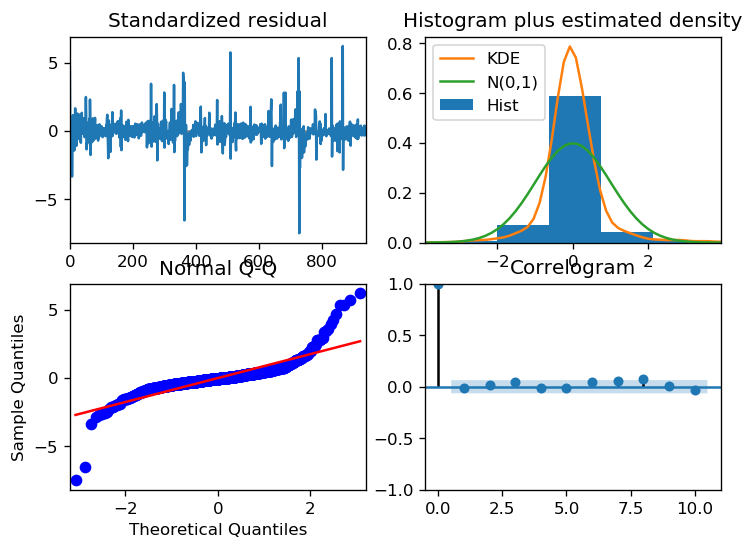

In [307]:
model1.plot_diagnostics(figsize=(7,5))
plt.show()

In [80]:
sales_train.rename(columns = {'date':'ds','item_cnt_day':'y'}, inplace = True)

In [33]:
sales_train

,ds,y
0,2013-01-01,1951.0
1,2013-01-02,8198.0
2,2013-01-03,7422.0
3,2013-01-04,6617.0
4,2013-01-05,6346.0
...,...,...
937,2015-07-27,1705.0
938,2015-07-28,1744.0
939,2015-07-29,1752.0
940,2015-07-30,1720.0


In [52]:
from prophet import Prophet

In [50]:
import plotly.graph_objs as go

In [47]:
pip install plotly

     |████████████████████████████████| 25.3 MB 4.0 MB/s eta 0:00:01
You should consider upgrading via the '/Users/parthpatel/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [294]:
sales['Day'] = sales['date'].dt.strftime('%w')

In [295]:
sales['Day'] = sales['Day'].astype(int)

In [296]:
sales['Weekend'] = 0
sales['Weekday'] = 0
sales.loc[(sales['Day']==0) | (sales['Day']==6),'Weekend'] = 1
sales.loc[(sales['Day']!=0) & (sales['Day']!=6),'Weekday'] = 1

In [297]:
sales_train = sales.loc[sales['date']<='2015-07-31'].copy()
sales_test = sales.loc[sales['date']>'2015-07-31'].copy()
sales_train.rename(columns = {'date':'ds','item_cnt_day':'y'}, inplace = True)

In [298]:
m = Prophet(seasonality_mode = 'additive',changepoint_prior_scale=0.1,seasonality_prior_scale=0.1)

m.add_regressor('Weekend')
m.add_regressor('Weekday')
m.add_seasonality(name='monthly', period=30, fourier_order=3)
m.add_seasonality(name='weekly', period=7, fourier_order=3)
m.fit(sales_train)
future = m.make_future_dataframe(periods=92, freq='D')
future['Day'] = future['ds'].dt.strftime('%w')
future['Day'] = future['Day'].astype(int)
future['Weekend'] = 0
future['Weekday'] = 0
future.loc[(future['Day']==0) | (future['Day']==6),'Weekend'] = 1
future.loc[(future['Day']!=0) & (future['Day']!=6),'Weekday'] = 1


INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


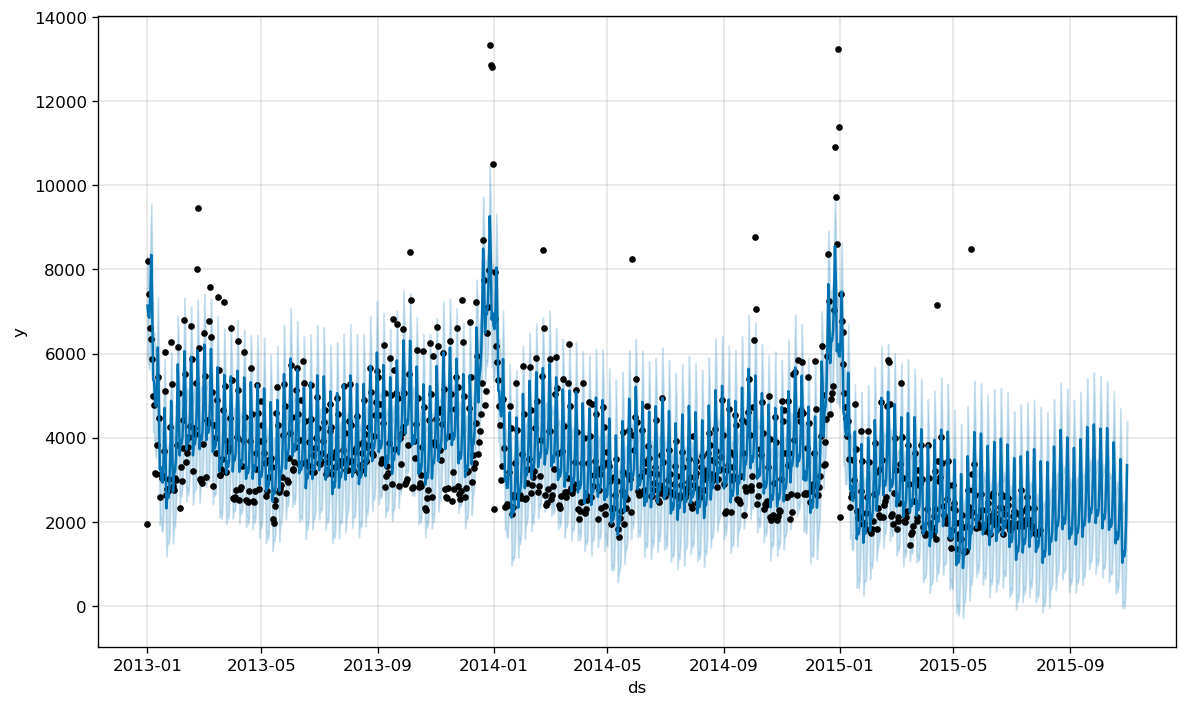

In [315]:
fig1 = m.plot(forecast)

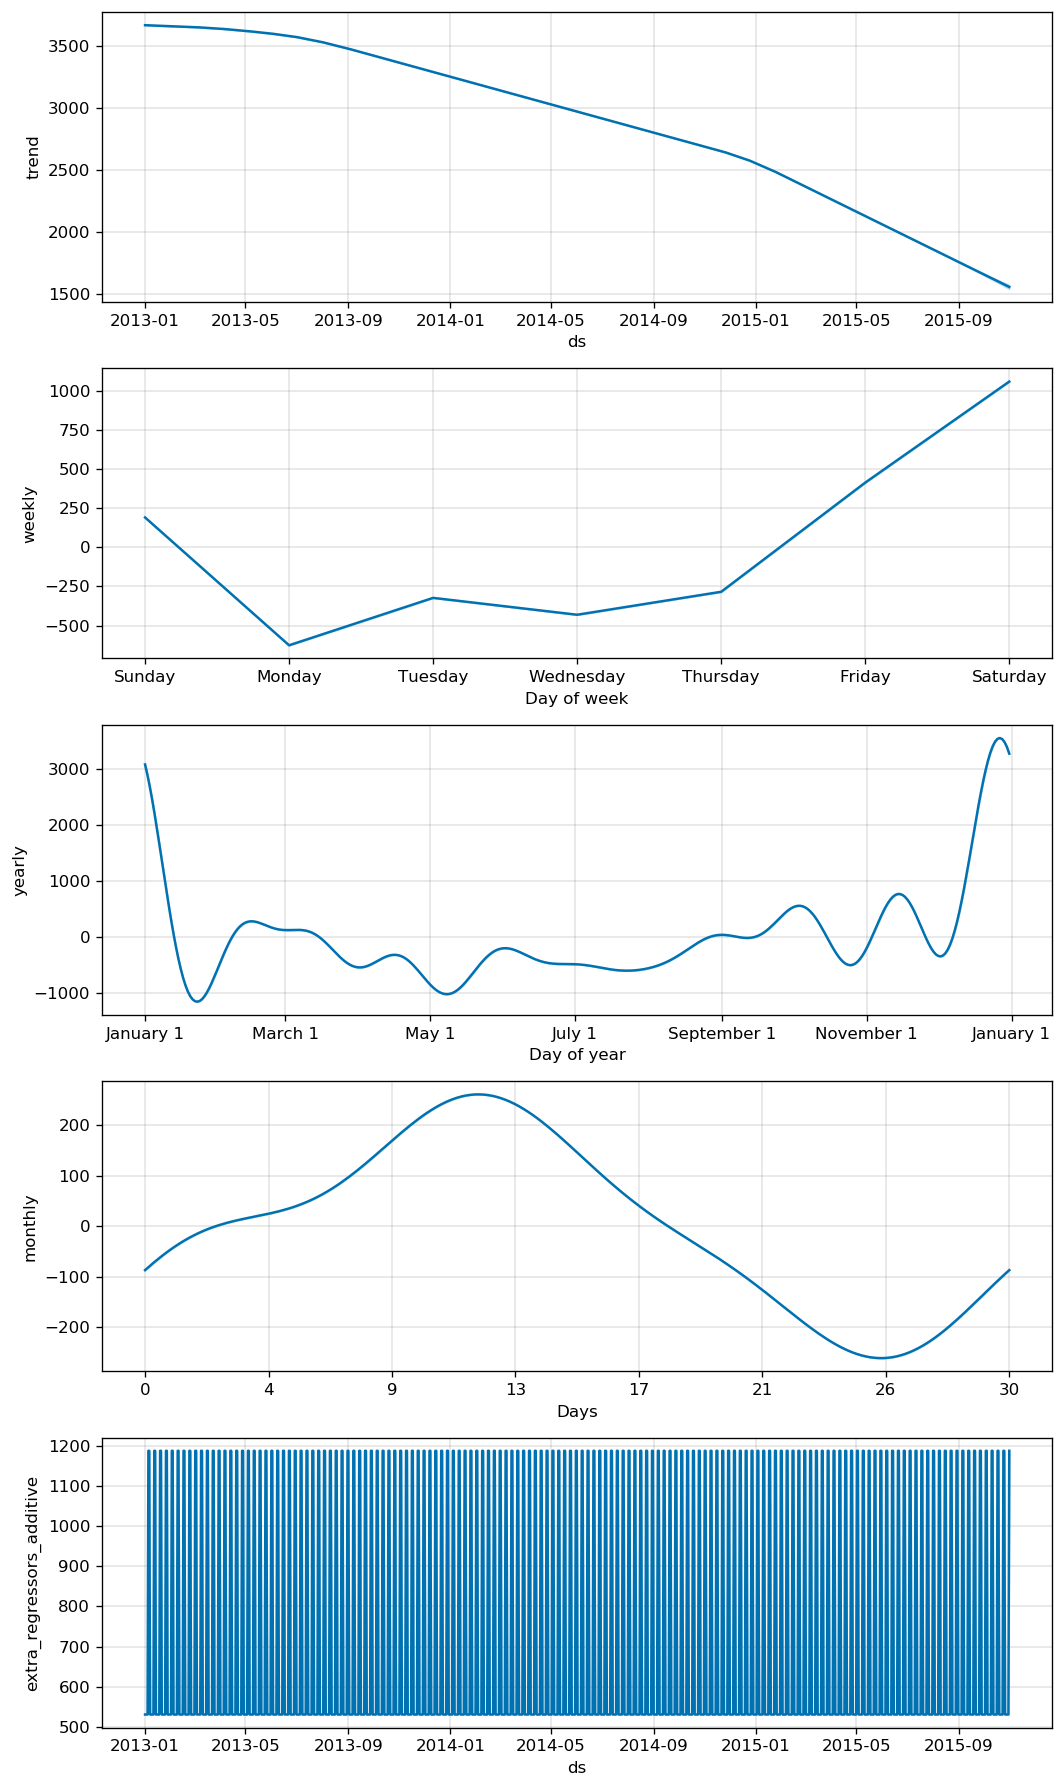

In [299]:
forecast = m.predict(future)
fig = m.plot_components(forecast)

In [300]:
mape = np.mean(np.abs(forecast.yhat[-92:] - sales_test.item_cnt_day)/np.abs(sales_test.item_cnt_day))  # MAPE
me = np.mean(forecast.yhat[-92:] - sales_test.item_cnt_day)             # ME
mae = np.mean(np.abs(forecast.yhat[-92:] - sales_test.item_cnt_day))    # MAE
mpe = np.mean((forecast.yhat[-92:] - sales_test.item_cnt_day)/sales_test.item_cnt_day)   # MPE
rmse = np.mean((forecast.yhat[-92:] - sales_test.item_cnt_day)**2)**.5  # RMSE
corr = np.corrcoef(forecast.yhat[-92:], sales_test.item_cnt_day)[0,1]   # corr
mins = np.amin(np.hstack([forecast.yhat[-92:][:,None], 
                              sales_test.item_cnt_day[:,None]]), axis=1)
maxs = np.amax(np.hstack([forecast.yhat[-92:][:,None], 
                              sales_test.item_cnt_day[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)             # minmax


/Users/parthpatel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/Users/parthpatel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/Users/parthpatel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/Users/parthpatel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, 

In [301]:
print({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

{'mape': 0.24708996201894895, 'me': 112.18222990989311, 'mae': 579.4172610249478, 'mpe': 0.0690543448829973, 'rmse': 760.049498768354, 'corr': 0.5353082338045984, 'minmax': 0.20150775900008322}


<function matplotlib.pyplot.legend(*args, **kwargs)>

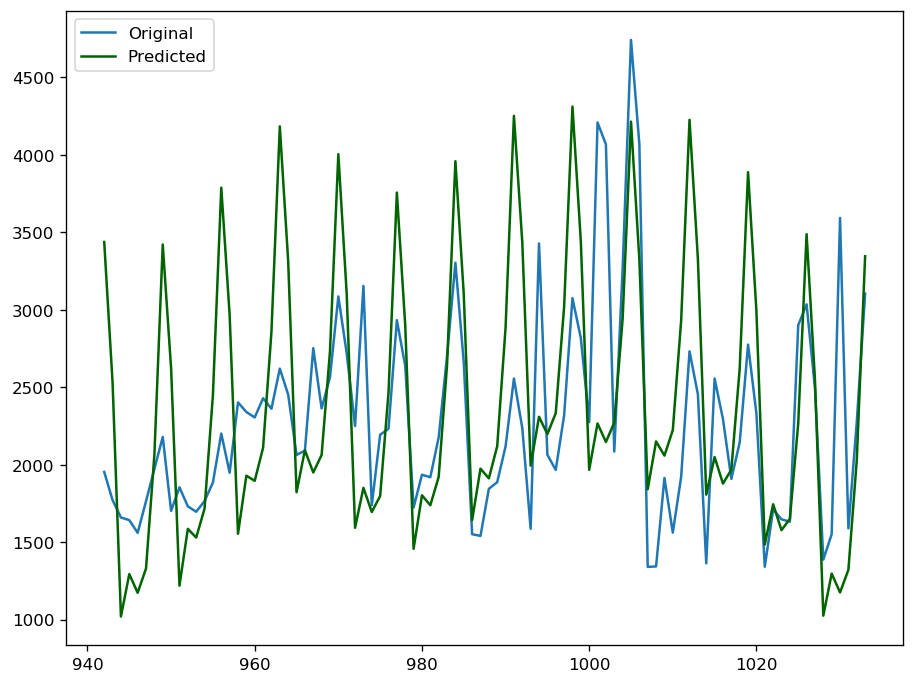

In [304]:
plt.plot(sales_test.item_cnt_day, label='Original')
plt.plot(forecast.yhat[-92:], label='Predicted',color='darkgreen')
plt.legend(loc="upper left")
plt.legend

In [123]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Weekday,Weekday_lower,Weekday_upper,Weekend,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3648.852041,5851.999155,8203.156956,3648.852041,3648.852041,723.126817,723.126817,723.126817,0.000000,...,-396.539896,-396.539896,-396.539896,3086.395001,3086.395001,3086.395001,0.0,0.0,0.0,7061.833962
1,2013-01-02,3648.132604,5668.392630,7989.392869,3648.132604,3648.132604,723.126817,723.126817,723.126817,0.000000,...,-513.505024,-513.505024,-513.505024,2894.606088,2894.606088,2894.606088,0.0,0.0,0.0,6752.360486
2,2013-01-03,3647.413167,5586.433609,7870.618599,3647.413167,3647.413167,723.126817,723.126817,723.126817,0.000000,...,-383.223878,-383.223878,-383.223878,2678.160512,2678.160512,2678.160512,0.0,0.0,0.0,6665.476618
3,2013-01-04,3646.693730,5899.124616,8325.161477,3646.693730,3646.693730,723.126817,723.126817,723.126817,0.000000,...,286.753131,286.753131,286.753131,2440.580501,2440.580501,2440.580501,0.0,0.0,0.0,7097.154179
4,2013-01-05,3645.974292,6854.478751,9330.592406,3645.974292,3645.974292,0.000000,0.000000,0.000000,977.097542,...,1278.252797,1278.252797,1278.252797,2185.709263,2185.709263,2185.709263,0.0,0.0,0.0,8087.033894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2015-10-27,1482.383545,77.160052,2414.828424,1480.910985,1483.694825,723.126817,723.126817,723.126817,0.000000,...,-396.539896,-396.539896,-396.539896,-519.624155,-519.624155,-519.624155,0.0,0.0,0.0,1289.346311
1030,2015-10-28,1479.066230,84.055373,2450.580562,1477.477604,1480.471627,723.126817,723.126817,723.126817,0.000000,...,-513.505024,-513.505024,-513.505024,-493.793904,-493.793904,-493.793904,0.0,0.0,0.0,1194.894119
1031,2015-10-29,1475.748915,235.076125,2638.772439,1474.010405,1477.226406,723.126817,723.126817,723.126817,0.000000,...,-383.223878,-383.223878,-383.223878,-453.537747,-453.537747,-453.537747,0.0,0.0,0.0,1362.114107
1032,2015-10-30,1472.431599,917.488734,3404.329469,1470.532087,1474.049391,723.126817,723.126817,723.126817,0.000000,...,286.753131,286.753131,286.753131,-399.562633,-399.562633,-399.562633,0.0,0.0,0.0,2082.748915


In [125]:
dtf_prophet

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,4448.112085,5955.426145,8195.024923,4448.112085,4448.112085,2617.259297,2617.259297,2617.259297,-468.872257,-468.872257,-468.872257,3086.131555,3086.131555,3086.131555,0.0,0.0,0.0,7065.371382
1,2013-01-02,4447.375873,5601.759686,7944.393528,4447.375873,4447.375873,2308.497940,2308.497940,2308.497940,-585.838542,-585.838542,-585.838542,2894.336483,2894.336483,2894.336483,0.0,0.0,0.0,6755.873813
2,2013-01-03,4446.639661,5434.862618,7954.775350,4446.639661,4446.639661,2222.331477,2222.331477,2222.331477,-455.550996,-455.550996,-455.550996,2677.882474,2677.882474,2677.882474,0.0,0.0,0.0,6668.971138
3,2013-01-04,4445.903449,5911.958870,8339.740031,4445.903449,4445.903449,2654.722271,2654.722271,2654.722271,214.430162,214.430162,214.430162,2440.292110,2440.292110,2440.292110,0.0,0.0,0.0,7100.625720
4,2013-01-05,4445.167237,6878.028532,9216.123994,4445.167237,4445.167237,3644.487693,3644.487693,3644.487693,1459.078711,1459.078711,1459.078711,2185.408981,2185.408981,2185.408981,0.0,0.0,0.0,8089.654930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2015-10-27,2275.102599,39.075112,2455.267406,2273.823266,2276.633252,-988.790133,-988.790133,-988.790133,-468.872257,-468.872257,-468.872257,-519.917876,-519.917876,-519.917876,0.0,0.0,0.0,1286.312466
1030,2015-10-28,2271.772657,-45.973759,2398.620025,2270.388869,2273.444222,-1079.943602,-1079.943602,-1079.943602,-585.838542,-585.838542,-585.838542,-494.105060,-494.105060,-494.105060,0.0,0.0,0.0,1191.829055
1031,2015-10-29,2268.442714,209.323269,2614.080829,2266.978206,2270.230234,-909.414126,-909.414126,-909.414126,-455.550996,-455.550996,-455.550996,-453.863130,-453.863130,-453.863130,0.0,0.0,0.0,1359.028588
1032,2015-10-30,2265.112772,856.107199,3284.299793,2263.478958,2267.036905,-185.468707,-185.468707,-185.468707,214.430162,214.430162,214.430162,-399.898869,-399.898869,-399.898869,0.0,0.0,0.0,2079.644065


In [126]:
from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,Weekend,additive,0.0,977.097542,977.097542,977.097542
1,Weekday,additive,0.0,723.126817,723.126817,723.126817
